Hi Aditya! My name is Dmitry and I will be revieweing your project.

I’ve left my comments throughout the notebook - look for green, yellow and red boxes. Please don’t delete these comments.

<div class="alert alert-success">
<b>Reviewer's comment</b>
<p>Success: everything is done well</p>
</div>

<div class="alert alert-warning">
<b>Reviewer's comment</b>
<p>Remarks: my recommendations to make the project even better</p>
</div>

<div class="alert alert-danger">
<b>Reviewer's comment</b>
<p>Error: some issues need fixing!</p>
</div>

<span style="color:red"> Keep in mind that the project will be accepted only when all the “red” issues are resolved.</span>

You can add your replies or questions related to my comments using this template:
<div class="alert alert-info">
<b>Student's comment</b>
</div>

### General feedback
- Thank you for the submission, this is a really nice first project!
- It is good that you've thoroughly investigated the problem, and explained and motivated your steps.
- The quality of code is nice too 👍
- There are a couple of issues, I think that couple of lines are missing in the end so I couldn't run the entire project, but it seems to be a minor issue.
- I've left some comments throughout the text, which may help you to make the project even better.
    - Specifically, I'd suggest to add some more automatization via functions and/or loops, to make the code more concise.
- Since all of the issues and comments are minor, I thin you'll have no trouble addressing them.
- So, good luck, and I'm looking forward to the updated version :)

### <mark>General feedback - V2</mark>
- Thanks for the updated project!
- You have addressed all of my comments, soo I'm happy to accept it and let you move on to the next one.
- Good luck with the rest of the course!
***

# Analyzing borrowers’ risk of defaulting

<div class="alert alert-warning">
<b>Reviewer's comment</b>
<p>It would be nice to have here an introduction from an analyst's perspective, outlining the goals and main steps on the analysis (imagine this is a real-life project intended for your colleagues or boss).</p>
</div>

In this analyse, we have to analyse the borrower's risk of defaulting. We have to find if number of children or marital status has any impact on defaulting a loan.

To this effect, we have to proceed as follows:

- First we have to open the dataset and have a loot at it.
- Next we need to preprocess the data.
- Then we have to do the analysis. We have 4 questions we need to answer:

    - Is there a connection between having kids and repaying a loan on time?
    - Is there a connection between marital status and repaying a loan on time?
    - Is there a connection between income level and repaying a loan on time?
    - How do different loan purposes affect on-time loan repayment?
- Finally we have to write a conclusion.

## 1. Open Dataset and look at the General information

We start this analysis by loading the dataset and looking at the first 5 rows to get an idea about it.

In [187]:
import pandas as pd
import matplotlib.pyplot as plt

In [188]:
# read the data from a csv file
try:
    credit_score = pd.read_csv('C:/Users/SkyNET/Desktop/Learn python/Projects/Data Preprocessing/credit_scoring_eng.csv')
except:
    credit_score = pd.read_csv('/datasets/credit_scoring_eng.csv')
credit_score.head(5)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding


In [189]:
credit_score.tail()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
21520,1,-4529.316663,43,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions
21521,0,343937.404131,67,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car
21522,1,-2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property
21523,3,-3112.481705,38,secondary education,1,married,0,M,employee,1,39054.888,buying my own car
21524,2,-1984.507589,40,secondary education,1,married,0,F,employee,0,13127.587,to buy a car


We call the .info() function to get more information about our dataset.
<br>We also call the .sample() function to see the contents of a random row in our dataset.

In [190]:
credit_score.info()
credit_score.sample()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12868,0,385238.888955,62,secondary education,1,unmarried,4,F,retiree,0,30844.94,to get a supplementary education


In [191]:
credit_score.describe(include='all')

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
count,21525.000000,19351.000000,21525.000000,21525,21525.000000,21525,21525.000000,21525,21525,21525.000000,19351.000000,21525
unique,NaN,NaN,NaN,15,NaN,5,NaN,3,8,NaN,NaN,38
top,NaN,NaN,NaN,secondary education,NaN,married,NaN,F,employee,NaN,NaN,wedding ceremony
freq,NaN,NaN,NaN,13750,NaN,12380,NaN,14236,11119,NaN,NaN,797
mean,0.538908,63046.497661,43.293380,NaN,0.817236,NaN,0.972544,NaN,NaN,0.080883,26787.568355,NaN
std,1.381587,140827.311974,12.574584,NaN,0.548138,NaN,1.420324,NaN,NaN,0.272661,16475.450632,NaN
min,-1.000000,-18388.949901,0.000000,NaN,0.000000,NaN,0.000000,NaN,NaN,0.000000,3306.762000,NaN
25%,0.000000,-2747.423625,33.000000,NaN,1.000000,NaN,0.000000,NaN,NaN,0.000000,16488.504500,NaN
50%,0.000000,-1203.369529,42.000000,NaN,1.000000,NaN,0.000000,NaN,NaN,0.000000,23202.870000,NaN
75%,1.000000,-291.095954,53.000000,NaN,1.000000,NaN,1.000000,NaN,NaN,0.000000,32549.611000,NaN


### 1.1 Conclusion

From the above information, we can see the following problems:
- We might have potentially missing values in 2 columns of out dataset. 
- We have negative values in 'days_employed' column. We also have extremely large values in some rows of this column. e.g. In the 5th row of the dataset, the number of days worked convertes to over 900 years of employment.
- Family_status and family_status_id have the same meaning.
- Minimum number of children is -1 and the maximum is 20. This seems incorrect.

<div class="alert alert-success">
<b>Reviewer's comment</b>
<p>Everything is good so far!</p>
</div>

## 2. Data Preprocessing

### 2.1 Filling Missing Values

In [192]:
print('Length of the dataset:', len(credit_score))
print()
print('Number of missing values (by columns):')
print(credit_score.isnull().sum())

print()
print('Percentage of data missing (by columns):')
print(credit_score.isnull().sum()/len(credit_score))

Length of the dataset: 21525

Number of missing values (by columns):
children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

Percentage of data missing (by columns):
children            0.000000
days_employed       0.100999
dob_years           0.000000
education           0.000000
education_id        0.000000
family_status       0.000000
family_status_id    0.000000
gender              0.000000
income_type         0.000000
debt                0.000000
total_income        0.100999
purpose             0.000000
dtype: float64


Here we see that:

+ There are 21525 rows in out dataset and there are 2174 missing values in the 'days_employed' and 'total_income' columns. 
+ We have about 10% of the rows missing data in the two aforementioned columns. We also note that both the columns with missing data are quantitative.

We are going to leave the 'days_employed' column alone and not fill its missing values. This column does not affect our target task. We do need to inform the Data engineers about this issue to find the root cause of it.

But we do need to investigate how to fill the missing values in the 'total_income' column so that we do not change the general characteristics of the dataset.

We know that the income can be influenced by the type of employment. So, first we find the value counts of the 'income_type' row where 'total_income' is missing.

In [193]:
print('Count of missing income by employment:')
print(credit_score[credit_score['total_income'].isnull()]['income_type'].value_counts())

Count of missing income by employment:
employee         1105
business          508
retiree           413
civil servant     147
entrepreneur        1
Name: income_type, dtype: int64


Now, we find the mean and median of 'total_income' according to the 'income_type'.

In [194]:
credit_score.groupby('income_type').total_income.agg(['count','min', 'median', 'mean', 'max'])

,count,min,median,mean,max
income_type,,,,,
business,4577,4592.450,27577.2720,32386.793835,362496.645
civil servant,1312,4672.012,24071.6695,27343.729582,145672.235
employee,10014,3418.824,22815.1035,25820.841683,276204.162
entrepreneur,1,79866.103,79866.1030,79866.103000,79866.103
paternity / maternity leave,1,8612.661,8612.6610,8612.661000,8612.661
retiree,3443,3306.762,18962.3180,21940.394503,117616.523
student,1,15712.260,15712.2600,15712.260000,15712.260
unemployed,2,9593.119,21014.3605,21014.360500,32435.602


Incomes differ from one income type to anoter. The imcome for business will be on average higher than for retiree.

We see that the average within a type is greater than the median. This implies that income has outliers with large values. So it's better to use the median for filling in the missing values.

We also see that in our table the income for the type of entrepreneur is filled only for one customer and the value is quite high, so we cannot fill in the missing value of this type by this single value. So, for the missing values for the entrepreneur should be filled in as the median value across the entire table (in this case, the estimate will most likely be underestimated) or completely removed this customer from the consideration.

In [195]:
median_total_income_employee = credit_score[credit_score['income_type'] == 'employee']['total_income'].median()
median_total_income_business = credit_score[credit_score['income_type'] == 'business']['total_income'].median()
median_total_income_retiree = credit_score[credit_score['income_type'] == 'retiree']['total_income'].median()
median_total_income_civil_servant = credit_score[credit_score['income_type'] == 'civil servant']['total_income'].median()
median_total_income_entrepreneur = credit_score['total_income'].median()

credit_score.loc[credit_score['income_type'] == 'employee', 'total_income'] = credit_score.loc[credit_score['income_type'] == 'employee', 'total_income'].fillna(value = median_total_income_employee)
credit_score.loc[credit_score['income_type'] == 'business', 'total_income'] = credit_score.loc[credit_score['income_type'] == 'business', 'total_income'].fillna(value = median_total_income_business)
credit_score.loc[credit_score['income_type'] == 'retiree', 'total_income'] = credit_score.loc[credit_score['income_type'] == 'retiree', 'total_income'].fillna(value = median_total_income_retiree)
credit_score.loc[credit_score['income_type'] == 'civil servant', 'total_income'] = credit_score.loc[credit_score['income_type'] == 'civil servant', 'total_income'].fillna(value = median_total_income_civil_servant)
credit_score.loc[credit_score['income_type'] == 'entrepreneur', 'total_income'] = credit_score.loc[credit_score['income_type'] == 'entrepreneur', 'total_income'].fillna(value = median_total_income_entrepreneur)

print('Missing values:')
print()
print(credit_score.isnull().sum())

Missing values:

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income           0
purpose                0
dtype: int64


<div class="alert alert-warning">
<b>Reviewer's comment</b>
<p>A useful tip: whenever you find yourself repeating the same lines of code multiple times, it is an indication that you could make your code look better using a function or a loop.</p>
</div>

We also need to check if we have any problems with the 'dob_years' column. Age cannot be negative or zero. Age also cannot be less than 18 as one needs to be an adult to have a bank account and to be able to apply for a loan.

In [196]:
print(credit_score['dob_years'].value_counts())

35    617
40    609
41    607
34    603
38    598
42    597
33    581
39    573
31    560
36    555
44    547
29    545
30    540
48    538
37    537
50    514
43    513
32    510
49    508
28    503
45    497
27    493
56    487
52    484
47    480
54    479
46    475
58    461
57    460
53    459
51    448
59    444
55    443
26    408
60    377
25    357
61    355
62    352
63    269
64    265
24    264
23    254
65    194
66    183
22    183
67    167
21    111
0     101
68     99
69     85
70     65
71     58
20     51
72     33
19     14
73      8
74      6
75      1
Name: dob_years, dtype: int64


We see that we have 101 rows with age 0. This might be an error due to data entry. Or it can also be due to errors in survey design, where age is not a required value above 0 and some people decide not to enter it.

Whatever be the case, 101 wrong entries are insignificant compared to the size of the dataset, so we can drop these rows without skewing our dataset.

In [197]:
credit_score = credit_score.drop(credit_score[credit_score.dob_years == 0].index)

<div class="alert alert-success">
<b>Reviewer's comment</b>
<p>Good catch!</p>
</div>

We also need to correct the children column in the data set. The error must have crept up during data entry.
First let us see how many rows have the wrong data entries

In [198]:
print(credit_score['children'].value_counts())

 0     14080
 1      4802
 2      2042
 3       328
 20       75
-1        47
 4        41
 5         9
Name: children, dtype: int64


We find that 75 people have number of children as 20 and 47 people have number of children as -1.
We assume that the value -1 should have been 1 and the value 20 should have been 2.

Thus we change the values for these rows. The total number of rows we change are 122, which is insignificant and would not skew our dataset.

In [199]:
credit_score['children'] = credit_score['children'].replace(-1, 1)
credit_score['children'] = credit_score['children'].replace(20, 2)

### 2.2 Changing Datatype

Now that we have addressed the missing values, we need to change the real number datatype to integer datatype. Let us also convert the datatype of debt, education_id, family_status_id, dob_years and children to int8.

In [200]:
credit_score['total_income'] = credit_score['total_income'].astype('int64')
credit_score['children'] = credit_score.children.astype('int8') 
credit_score['dob_years'] = credit_score.dob_years.astype('int8') 
credit_score['education_id'] = credit_score.education_id.astype('int8') 
credit_score['family_status_id'] = credit_score.family_status_id.astype('int8')
credit_score['debt'] = credit_score.debt.astype('bool')
credit_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21424 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21424 non-null  int8   
 1   days_employed     19260 non-null  float64
 2   dob_years         21424 non-null  int8   
 3   education         21424 non-null  object 
 4   education_id      21424 non-null  int8   
 5   family_status     21424 non-null  object 
 6   family_status_id  21424 non-null  int8   
 7   gender            21424 non-null  object 
 8   income_type       21424 non-null  object 
 9   debt              21424 non-null  bool   
 10  total_income      21424 non-null  int64  
 11  purpose           21424 non-null  object 
dtypes: bool(1), float64(1), int64(1), int8(4), object(5)
memory usage: 1.4+ MB


<div class="alert alert-danger">
<b>Reviewer's comment</b>
<p>Is there a column for which "bool" would be a more natural type?</p>
</div>

<div class="alert alert-info">
<b>Student's comment</b>
<p>The debt column can be boolean. I understand.</p>
</div>

<div class="alert alert-success">
<b>Reviewer's comment - V2</b>
<p>👍</p>
</div>

### 2.3 Removing Duplicates
Next, we look for duplicates in the data.

In [201]:
print('Number of duplicated rows:', credit_score.duplicated().sum())

Number of duplicated rows: 54


We have to look at the case of the string variables as well.

In [202]:
credit_score['education'].value_counts()

secondary education    13691
bachelor's degree       4686
SECONDARY EDUCATION      770
Secondary Education      708
some college             666
BACHELOR'S DEGREE        273
Bachelor's Degree        266
primary education        250
Some College              47
SOME COLLEGE              29
PRIMARY EDUCATION         17
Primary Education         15
graduate degree            4
Graduate Degree            1
GRADUATE DEGREE            1
Name: education, dtype: int64

We have to change the case of all these to lower to get a better understanding of duplicates.

We might have the same issue for family_status, gender, income_type and purpose. So we perform the same operation on these columns as well.

In [203]:
credit_score['education'] = credit_score['education'].str.lower()
credit_score['family_status'] = credit_score['family_status'].str.lower()
credit_score['gender'] = credit_score['gender'].str.upper()
credit_score['income_type'] = credit_score['income_type'].str.lower()
credit_score['purpose'] = credit_score['purpose'].str.lower()

<div class="alert alert-warning">
<b>Reviewer's comment</b>
<p>Again, looks like a loop here would make the code more concise.</p>
</div>

Let us check if the number of duplicates have changed after our case transformation.

In [204]:
print('Number of duplicated rows:', credit_score.duplicated().sum())

Number of duplicated rows: 71


We can drop duplicates when we have differences only in string cases. But, we may have duplicates by meaning the purpose column. So we need to perform lemmatization on that column.

<div class="alert alert-success">
<b>Reviewer's comment</b>
<p>Exactly!</p>
</div>

### 2.4 Lemmatization

Let us first have a look at the values in the purpose column.

In [205]:
purposes_list = credit_score['purpose'].unique()
print(purposes_list)
len(purposes_list)

['purchase of the house' 'car purchase' 'supplementary education'
 'to have a wedding' 'housing transactions' 'education' 'having a wedding'
 'purchase of the house for my family' 'buy real estate'
 'buy commercial real estate' 'buy residential real estate'
 'construction of own property' 'property' 'building a property'
 'buying a second-hand car' 'buying my own car'
 'transactions with commercial real estate' 'building a real estate'
 'housing' 'transactions with my real estate' 'cars' 'to become educated'
 'second-hand car purchase' 'getting an education' 'car'
 'wedding ceremony' 'to get a supplementary education'
 'purchase of my own house' 'real estate transactions'
 'getting higher education' 'to own a car' 'purchase of a car'
 'profile education' 'university education'
 'buying property for renting out' 'to buy a car' 'housing renovation'
 'going to university']


38

We now import the required libraries and download the required packages to perform lemmatization.

In [206]:
import nltk
from nltk.stem import WordNetLemmatizer
from collections import Counter
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
stopwords = set(stopwords.words('english'))
is_noun = lambda pos: pos[:2] == 'NN'

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SkyNET\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SkyNET\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SkyNET\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\SkyNET\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Now we find the different categories of purpose.

In [207]:
wordnet_lemma = WordNetLemmatizer()
lemmas = []
for text in purposes_list:
    words = nltk.word_tokenize(text.lower())
    lemmas += [wordnet_lemma.lemmatize(w, pos='n') for (w,pos) in nltk.pos_tag(words) if w not in stopwords and is_noun(pos)]
purpose_categories = list(Counter(lemmas).keys())
purpose_categories

['purchase',
 'house',
 'car',
 'education',
 'wedding',
 'housing',
 'transaction',
 'family',
 'estate',
 'construction',
 'property',
 'second-hand',
 'ceremony',
 'profile',
 'university',
 'renovation']

Now we create a dictionary of the categorical purpose values.

In [208]:
from nltk.stem import SnowballStemmer 
english_stemmer = SnowballStemmer('english')

In [209]:
category_purpose_dict = {text_purpose:next(category for category in purpose_categories if english_stemmer.stem(category) in text_purpose or category in text_purpose) for text_purpose in set(credit_score['purpose'])}
category_purpose_dict

{'buy real estate': 'estate',
 'to have a wedding': 'wedding',
 'buy residential real estate': 'estate',
 'second-hand car purchase': 'purchase',
 'to get a supplementary education': 'education',
 'to own a car': 'car',
 'transactions with commercial real estate': 'transaction',
 'car purchase': 'purchase',
 'transactions with my real estate': 'transaction',
 'property': 'property',
 'to become educated': 'education',
 'university education': 'education',
 'purchase of a car': 'purchase',
 'going to university': 'university',
 'housing': 'house',
 'to buy a car': 'car',
 'buying property for renting out': 'property',
 'building a property': 'property',
 'profile education': 'education',
 'getting higher education': 'education',
 'building a real estate': 'estate',
 'education': 'education',
 'buying a second-hand car': 'car',
 'wedding ceremony': 'wedding',
 'having a wedding': 'wedding',
 'cars': 'car',
 'car': 'car',
 'purchase of the house': 'purchase',
 'purchase of the house for m

We need to make some more changes. Like 'buying real estate' can be under the category 'house' instead of 'estate'. We have to do this manually.

In [210]:
for x, y in category_purpose_dict.items():   # we take 2 random variables x and y to perform the operation
    if not y=='car' and 'car' in x:
        category_purpose_dict[x] = 'car'
        continue
    if not y=='house' and ('estate' in x or 'house' in x):
        category_purpose_dict[x] = 'house'
        continue
    if not y=='property' and ('construction' in x or 'property' in x):
        category_purpose_dict[x] = 'property'
        continue
category_purpose_dict

{'buy real estate': 'house',
 'to have a wedding': 'wedding',
 'buy residential real estate': 'house',
 'second-hand car purchase': 'car',
 'to get a supplementary education': 'education',
 'to own a car': 'car',
 'transactions with commercial real estate': 'house',
 'car purchase': 'car',
 'transactions with my real estate': 'house',
 'property': 'property',
 'to become educated': 'education',
 'university education': 'education',
 'purchase of a car': 'car',
 'going to university': 'university',
 'housing': 'house',
 'to buy a car': 'car',
 'buying property for renting out': 'property',
 'building a property': 'property',
 'profile education': 'education',
 'getting higher education': 'education',
 'building a real estate': 'house',
 'education': 'education',
 'buying a second-hand car': 'car',
 'wedding ceremony': 'wedding',
 'having a wedding': 'wedding',
 'cars': 'car',
 'car': 'car',
 'purchase of the house': 'house',
 'purchase of the house for my family': 'house',
 'housing tra

We can replace the current purpose values in the dataset with our categorical values from the dictionary.

In [211]:
credit_score['purpose'] = credit_score['purpose'].replace(category_purpose_dict)
credit_score.sample(5)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
15252,0,-627.600611,28,secondary education,1,civil partnership,1,M,employee,True,54338,house
603,1,-918.457704,28,bachelor's degree,0,married,0,F,business,False,17814,car
6404,2,-1476.702507,34,secondary education,1,married,0,M,employee,False,10481,house
18961,0,-916.580409,29,secondary education,1,married,0,M,employee,False,29044,house
17646,0,NaN,49,some college,2,married,0,M,business,False,27577,education


Now we look for duplicates once again.

In [212]:
print('Number of duplicated rows:', credit_score.duplicated().sum())

Number of duplicated rows: 304


In [213]:
credit_score.drop_duplicates(inplace = True)

In [214]:
print('Number of duplicated rows:', credit_score.duplicated().sum())

Number of duplicated rows: 0


<div class="alert alert-success">
<b>Reviewer's comment</b>
<p>Well done! </p>
</div>

### 2.5 Categorizing Data 

First we have a look at the categorical data.
- purpose : categorical
- income_type : Categorical
- gender : Categorical
- family_status : Categorical
- education : Categorical

In [215]:
credit_score['gender'].unique()

array(['F', 'M', 'XNA'], dtype=object)

We have an unknown value 'XNA' in the gender column. We need to have a closer look at it before moving forward.

In [216]:
credit_score[credit_score['gender']=='XNA']

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
10701,0,-2358.600502,24,some college,2,civil partnership,1,XNA,business,False,32624,house


Let us check if we have other records with the same income_type.

In [217]:
income_type = credit_score[credit_score['gender']=='XNA'].reset_index()['income_type'][0]
credit_score[credit_score['income_type'] == income_type].shape
credit_score.groupby('income_type').agg(['mean', 'count'])

children         days_employed        dob_years  \
                                 mean  count           mean count       mean   
income_type                                                                    
business                     0.525646   5030   -2112.798330  4559  39.821471   
civil servant                0.602626   1447   -3388.508552  1306  40.804423   
employee                     0.580169  10902   -2328.603723  9964  39.991103   
entrepreneur                 0.000000      2    -520.848083     1  42.500000   
paternity / maternity leave  2.000000      1   -3296.759962     1  39.000000   
retiree                      0.096653   3735  365015.727554  3426  59.351807   
student                      0.000000      1    -578.751554     1  22.000000   
unemployed                   0.500000      2  366413.652744     2  38.000000   

                                   education_id        family_status_id  \
                             count         mean  count             mean   
income_type                                                               
business                      5030     0.716103   5030         1.037177   
civil servant                 1447     0.673117   1447         0.859019   
employee                     10902     0.849569  10902         0.961200   
entrepreneur                     2     0.000000      2         0.500000   
paternity / maternity leave      1     1.000000      1         0.000000   
retiree                       3735     0.914324   3735         0.993842   
student                          1     0.000000      1         4.000000   
unemployed                       2     0.500000      2         0.500000   

                                        debt         total_income         
                             count      mean  count          mean  count  
income_type                                                               
business                      5030  0.074553   5030  31945.538171   5030  
civil servant                 1447  0.059433   1447  27040.244644   1447  
employee                     10902  0.096680  10902  25565.276463  10902  
entrepreneur                     2  0.000000      2  51534.000000      2  
paternity / maternity leave      1  1.000000      1   8612.000000      1  
retiree                       3735  0.057564   3735  21692.533333   3735  
student                          1  0.000000      1  15712.000000      1  
unemployed                       2  0.500000      2  21014.000000      2

We see that there are 5030 entries with the 'business' income_type. Only one of this has the gender as 'XNA'. We can delete this entry as it would not skew our dataset.

In [218]:
credit_score = credit_score[credit_score['gender'] != 'XNA']
credit_score[credit_score['gender']=='XNA']

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose


Now we look at the categorical data once again.

In [219]:
credit_score['gender'].unique()

array(['F', 'M'], dtype=object)

In [220]:
credit_score['income_type'].unique()

array(['employee', 'retiree', 'business', 'civil servant', 'unemployed',
       'entrepreneur', 'student', 'paternity / maternity leave'],
      dtype=object)

In [221]:
credit_score['family_status'].unique()

array(['married', 'civil partnership', 'widow / widower', 'divorced',
       'unmarried'], dtype=object)

In [222]:
credit_score['education'].unique()

array(["bachelor's degree", 'secondary education', 'some college',
       'primary education', 'graduate degree'], dtype=object)

In [223]:
credit_score['purpose'].unique()

array(['house', 'car', 'education', 'wedding', 'property', 'university'],
      dtype=object)

We can either encode the education and family_status or we can use the education_id and family_status_id.
We will encode the other categorical variables.

<div class="alert alert-success">
<b>Reviewer's comment</b>
<p>Well, this is not really required in this project, but in general it is not a bad thing to do.</p>
</div>

In [224]:
map_gender = {'F':1,'M':0}
map_purpose = {purpose:index for index, purpose in enumerate(credit_score['purpose'].unique())}
map_purpose

{'house': 0,
 'car': 1,
 'education': 2,
 'wedding': 3,
 'property': 4,
 'university': 5}

In [225]:
map_family_status = {row['family_status_id']:row['family_status'] for _, row in credit_score.drop_duplicates(['family_status_id', 'family_status'])[['family_status_id', 'family_status']].iterrows()}
map_family_status

{0: 'married',
 1: 'civil partnership',
 2: 'widow / widower',
 3: 'divorced',
 4: 'unmarried'}

In [226]:
map_income_type = {income_type:index for index, income_type in enumerate(credit_score['income_type'].unique())}
map_income_type

{'employee': 0,
 'retiree': 1,
 'business': 2,
 'civil servant': 3,
 'unemployed': 4,
 'entrepreneur': 5,
 'student': 6,
 'paternity / maternity leave': 7}

In [227]:
credit_score['income_type_id'] = credit_score['income_type'].map(map_income_type)
credit_score["purpose_id"] = credit_score["purpose"].map(map_purpose)
credit_score['gender_id'] = credit_score['gender'].map(map_gender)
credit_score['gender_id'] = credit_score['gender_id'].astype(int)

In [228]:
credit_score.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,income_type_id,purpose_id,gender_id
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,False,40620,house,0,0,1
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,False,17932,car,0,1,1
2,0,-5623.422610,33,secondary education,1,married,0,M,employee,False,23341,house,0,0,0
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,False,42820,education,0,2,0
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,False,25378,wedding,1,3,1


In [229]:
cols = ['income_type', 'gender', 'purpose', 'education', 'family_status']
credit_score = credit_score.drop([col for col in cols if col in credit_score.columns], axis=1)

In [230]:
credit_score.head(5)

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income,income_type_id,purpose_id,gender_id
0,1,-8437.673028,42,0,0,False,40620,0,0,1
1,1,-4024.803754,36,1,0,False,17932,0,1,1
2,0,-5623.422610,33,1,0,False,23341,0,0,0
3,3,-4124.747207,32,1,0,False,42820,0,2,0
4,0,340266.072047,53,1,1,False,25378,1,3,1


In [231]:
credit_score['total_income'].describe()

count     21119.000000
mean      26501.460438
std       15801.269361
min        3306.000000
25%       17121.000000
50%       22815.000000
75%       31446.500000
max      362496.000000
Name: total_income, dtype: float64

Let us create scatter plots for total_income versus income_type_id and purpose_id.

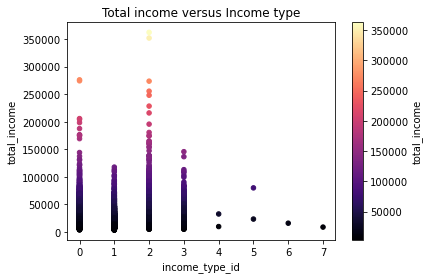

In [280]:
plot_1 = credit_score.plot.scatter(x='income_type_id', y='total_income', c= 'total_income', title='Total income versus Income type', colormap='magma', sharex=False)

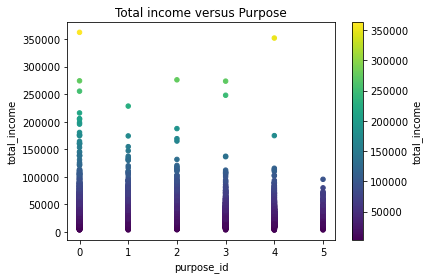

In [281]:
plot_2 = credit_score.plot.scatter(x='purpose_id', y='total_income', c= 'total_income', title='Total income versus Purpose', colormap='viridis', sharex=False)

<div class="alert alert-warning">
<b>Reviewer's comment</b>
<p>Whenever you make any plots, make sure that all axes are labeled!</p>
</div>

In [233]:
credit_score[['dob_years', 'total_income', 'children']].describe()

,dob_years,total_income,children
count,21119.000000,21119.000000,21119.000000
mean,43.430371,26501.460438,0.483214
std,12.241550,15801.269361,0.757567
min,19.000000,3306.000000,0.000000
25%,33.000000,17121.000000,0.000000
50%,42.000000,22815.000000,0.000000
75%,53.000000,31446.500000,1.000000
max,75.000000,362496.000000,5.000000


Next, we categorize the 'dob_years', 'total_income' and 'children' columns.

In [282]:
def category_total_income(total_income):
    if total_income < 75000:
        return 0
    elif 75000 <= total_income < 120000:
        return 1
    elif 120000 <= total_income < 150000:
        return 2
    elif 150000 <= total_income < 200000:
        return 3
    else:
        return 4
    
def category_children(children):
    if children < 1:
        return 0
    elif 1 <= children < 3:
        return 1
    else:
        return 2

def category_dob_years(dob_years):
    if dob_years < 35:
        return 0
    elif 35 <= dob_years < 45:
        return 1
    else:
        return 2

<div class="alert alert-warning">
<b>Reviewer's comment</b>
<p>For the categories by income, I usually suggest to motivate the choice of category thresholds, or, ideally, extract them from data (for example, using quantiles). It is up to you if you want to fix it here, but keep in mind in the future projects that if you really want to hard-code any specific values, it should be well motivated.</p>
</div>

<div class="alert alert-info">
<b>Student's comment</b>
<p>I understand what you are saying. I did think about using quantiles to categorize the incomes. But I couldn't decide whether to use quartiles or any other random quantiles. How do we make that decision?</p>
</div>

<div class="alert alert-success">
<b>Reviewer's comment - V2</b>
<p>I think this will always depend on the particular problem and particular dataset. But in general you need to make sure that all categories have reasonable number of data points, otherwise comparing them will be inconvenient.</p>
</div>

In [287]:
credit_score['children_category'] = credit_score['children'].apply(category_children)
credit_score['total_income_category'] = credit_score['total_income'].apply(category_total_income)
credit_score['dob_years_category'] = credit_score['dob_years'].apply(category_dob_years)

credit_score.head(5)

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income,income_type_id,purpose_id,gender_id,children_category,total_income_category,dob_years_category,has_children
0,1,-8437.673028,42,0,0,False,40620,0,0,1,1,0,1,1
1,1,-4024.803754,36,1,0,False,17932,0,1,1,1,0,1,1
2,0,-5623.422610,33,1,0,False,23341,0,0,0,0,0,0,0
3,3,-4124.747207,32,1,0,False,42820,0,2,0,2,0,0,1
4,0,340266.072047,53,1,1,False,25378,1,3,1,0,0,2,0


#### 2.5.1 Conclusion

We have categorized 'dob_years', 'total_income' and the 'children' columns. Purpose, gender, family_status, education were encoded.

## 3. Study of the impact of Investigation on Loan Repayment

In [288]:
print('In average debt defaul rate is {:.1%}'.format(credit_score.debt.mean()))

In average debt defaul rate is 8.2%


### 3.1 Is there a connection between having kids and repaying a loan on time?

To answer this, we can use the children and children_category column to check default rates.

In [289]:
credit_score['has_children'] = credit_score['children'].apply(lambda c: int(c>0))
credit_score_children = credit_score[credit_score['debt']==0].groupby(['children','debt']).size().reset_index().merge(credit_score[credit_score['debt']==1].groupby(['children','debt']).size().reset_index(), on='children')
credit_score_children["rate"] = 100*credit_score_children["0_y"]/credit_score_children["0_x"]
credit_score_children

,children,debt_x,0_x,debt_y,0_y,rate
0,0,False,12775,True,1057,8.273973
1,1,False,4364,True,442,10.128323
2,2,False,1901,True,202,10.625986
3,3,False,301,True,27,8.970100
4,4,False,37,True,4,10.810811


<div class="alert alert-success">
<b>Reviewer's comment</b>
<p>If you want to make the column with percentages look even nicer, see example <a href="https://stackoverflow.com/questions/54110289/pandas-dataframe-column-of-floats-to-percentage-style-error"> here</a>. </p>
</div>

In [290]:
credit_score_children = credit_score[credit_score['debt']==0].groupby(['children_category','debt']).size().reset_index().merge(credit_score[credit_score['debt']==1].groupby(['children_category','debt']).size().reset_index(), on='children_category')
credit_score_children["rate"] = 100*credit_score_children["0_y"]/credit_score_children["0_x"]
credit_score_children

,children_category,debt_x,0_x,debt_y,0_y,rate
0,0,False,12775,True,1057,8.273973
1,1,False,6265,True,644,10.279330
2,2,False,347,True,31,8.933718


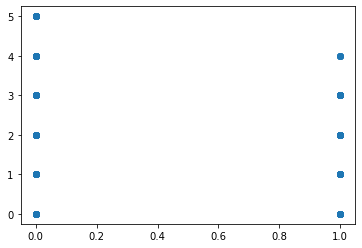

In [291]:
plt.scatter(credit_score['debt'], credit_score['children'])
plt.show()

As we see, there is a difference between borrowers having kids and repaying a loan on time as compared to those that do not have children. But it's not like that in relative figures, because we see an equal distribution.

Let us check Spearman's correlation.

In [292]:
credit_score[['children_category', 'debt']].corr(method='spearman')

,children_category,debt
children_category,1.000000,0.027466
debt,0.027466,1.000000


In [293]:
credit_score[['children', 'debt']].corr(method='spearman')

,children,debt
children,1.000000,0.027724
debt,0.027724,1.000000


A relation between having kids and repaying a loan on time is weak. People without kids show marginally less problems with repaying a loan on time.

### 3.2 Is there a connection between marital status and repaying a loan on time?

In [294]:
credit_score_family = credit_score[credit_score['debt']==0].groupby(['family_status_id','debt']).size().reset_index().merge(credit_score[credit_score['debt']==1].groupby(['family_status_id','debt']).size().reset_index(), on='family_status_id')
credit_score_family["rate"] = 100*credit_score_family["0_y"]/credit_score_family["0_x"]
credit_score_family["family_status"] = credit_score_family["family_status_id"].map(map_family_status)
credit_score_family

,family_status_id,debt_x,0_x,debt_y,0_y,rate,family_status
0,0,False,11180,True,926,8.282648,married
1,1,False,3720,True,386,10.376344,civil partnership
2,2,False,885,True,62,7.005650,widow / widower
3,3,False,1099,True,85,7.734304,divorced
4,4,False,2503,True,273,10.906912,unmarried


<div class="alert alert-danger">
<b>Reviewer's comment</b>
<p>I guess some cells or lines of code are missing earlier?</p>
</div>

<div class="alert alert-info">
<b>Student's comment</b>
<p>I removed the mapping of the 'family_status' in the code above after I completed this section, because I decided to use the 'family_status_id' which was already encoded. But I forgot that I used that very map in this section.</p>
</div>

<div class="alert alert-success">
<b>Reviewer's comment</b>
<p>Thanks for fixing, now everything is in place.</p>
</div>

In [295]:
credit_score[['family_status_id', 'debt']].corr(method='spearman')

,family_status_id,debt
family_status_id,1.000000,0.022486
debt,0.022486,1.000000


We see a same picture as before. There is weak relation. It does look like widow / widower and divorced groups have marginally good figures.

### 3.3 Is there a relation between income level and repaying a loan on time?

In [296]:
map_total_income = {0:'<75000', 1:'[75000, 120000)',2:'[120000, 150000)',3:'[150000,200000)',4:'>=200000'}
credit_score_income = credit_score[credit_score['debt']==0].groupby(['total_income_category','debt']).size().reset_index().merge(credit_score[credit_score['debt']==1].groupby(['total_income_category','debt']).size().reset_index(), on='total_income_category')
credit_score_income["rate"] = 100*credit_score_income["0_y"]/credit_score_income["0_x"]
credit_score_income["total_income_title"] = credit_score_income["total_income_category"].map(map_total_income)
credit_score_income

,total_income_category,debt_x,0_x,debt_y,0_y,rate,total_income_title
0,0,False,19115,True,1716,8.977243,<75000
1,1,False,227,True,12,5.286344,"[75000, 120000)"
2,2,False,19,True,2,10.526316,"[120000, 150000)"
3,3,False,16,True,1,6.250000,"[150000,200000)"
4,4,False,10,True,1,10.000000,>=200000


In [297]:
credit_score[['total_income_category', 'debt']].corr(method='spearman')

,total_income_category,debt
total_income_category,1.000000,-0.011312
debt,-0.011312,1.000000


We see that there is a weak negative correlation, but it close to zero. We can also see that, clients with <75000 and >=200000 total_income have the best figures.

### 3.4 How do different loan purposes affect on-time repayment of the loan?

In [298]:
map_purpose_reverse = {v:k for k, v in map_purpose.items()}
credit_score_purpose = credit_score[credit_score['debt']==0].groupby(['purpose_id','debt']).size().reset_index().merge(credit_score[credit_score['debt']==1].groupby(['purpose_id','debt']).size().reset_index(), on='purpose_id')
credit_score_purpose["rate"] = 100*credit_score_purpose["0_y"]/credit_score_purpose["0_x"]
credit_score_purpose["purpose"] = credit_score_purpose["purpose_id"].map(map_purpose_reverse)
credit_score_purpose

,purpose_id,debt_x,0_x,debt_y,0_y,rate,purpose
0,0,False,7509,True,590,7.857238,house
1,1,False,3851,True,399,10.360945,car
2,2,False,3141,True,327,10.410697,education
3,3,False,2108,True,184,8.728653,wedding
4,4,False,2328,True,189,8.118557,property
5,5,False,450,True,43,9.555556,university


In [299]:
credit_score[['purpose_id', 'debt']].corr(method='spearman')

,purpose_id,debt
purpose_id,1.000000,0.013629
debt,0.013629,1.000000


Once again, we see a weak relation between purpose of loan and debt. Still, we see that a majority of debtors are from 'car' and 'education' groups.

<div class="alert alert-warning">
<b>Reviewer's comment</b>
<p>And once again, if you manage to implement this part using a function instead of copy-pasting similar lines multiple times, that would look awesome :)</p>
</div>

<div class="alert alert-info">
<b>Student's comment</b>
<p>Do you mean the work of doing the spearman's correlation? It occured to me that I could use a function and call it.</p>
</div>

<div class="alert alert-success">
<b>Reviewer's comment - V2</b>
<p>Answering every one of questions above contains the same sequence of commands (groupby, reset index, map, etc). That could be in a function that takes the variable name and category map as inputs and returns debt rates.</p>
</div>

## 4. Final Conclusion

Before proceeding to the analysis, we preprocessed the data.

A general overview of the data revealed the following:

- columns with some odd and unknown values and one column with incorect data
- columns with excess types
- columns with null values
- columns with case sensitive duplicated values
- completely duplicated lines

We must contact the data engineer or the survey designer, who sent the source file, about the column with incorrect values, and also to clarify other minor inaccuracies.

There were missing values in the total_income column. The missing data was around 10% of the data. The total income depends on the type of employment that the bank's customer is engaged in. So that missing values in total income were filled in according to the income type. The excess types were converted to appropriate ones. The case sensitive duplicated values were fixed to lowercase. The loan purpose column was converted into a categorical column by lemmatization. Then the completely duplicated lines were dropped.

To look at the relationship between having kids, marital status, income level and the loan purpose with the timely repaying a loan, the corresponding categories were created with a sufficient number of observations within them.

Further, the debt default rate was considered for each group within the categories. Though the correlations between debt and the above described columns was weak, the following have been identified:

- People without kids show marginally less problems with repaying a loan on time.
- Widow / widower and divorced groups have marginally better figures for repaying a loan on time.
- Clients with <75000 and >=200000 total_income have the best figures for repaying a loan on time.
- Highest defaulters are from 'car' and 'education' groups of the purpose category.

<div class="alert alert-success">
<b>Reviewer's comment</b>
<p>Nice conlcusion! I would maybe add a few numbers with specific default rates for some categories of people, and the average rate as well.
    
A tip for a good introduction is that this conclusion should answer the goals and questions stated in the introduction. Ask yourself - if you only read introduction and conclusion, would you be able to understand what has been achieved in the project with sufficient level of detail?</p>
</div>